In [1]:
import numpy as np
from scipy import signal, misc
import matplotlib.pyplot as plt

In [2]:
image = misc.face(gray=True)
w = np.random.rand(50, 50)
image_new = signal.fftconvolve(image, w)

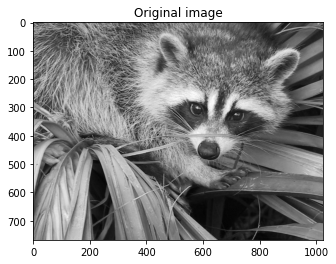

In [3]:
plt.figure()
plt.imshow(image)
plt.gray()
plt.title('Original image')
plt.show()

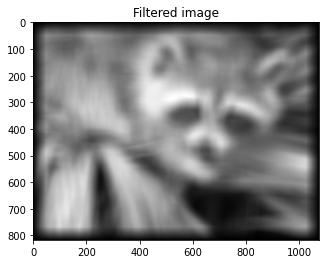

In [4]:
plt.figure()
plt.imshow(image_new)
plt.gray()
plt.title('Filtered image')
plt.show()

In [5]:
x = np.array([1., 0., 0., 0.])
b = np.array([1.0/2, 1.0/4])
a = np.array([1.0, -1.0/3])
signal.lfilter(b, a, x)

array([0.5       , 0.41666667, 0.13888889, 0.0462963 ])

In [6]:
zi = signal.lfiltic(b, a, y=[2.])
zi

array([0.66666667])

In [7]:
signal.lfilter(b, a, x, zi=zi)

(array([1.16666667, 0.63888889, 0.21296296, 0.07098765]), array([0.02366255]))

In [8]:
num = [1, 3, 3]
den = [1, 2, 1]
sys = signal.TransferFunction(num, den)

$$G(s)=\frac{s^2+3s+3}{s^2+2s+1}$$

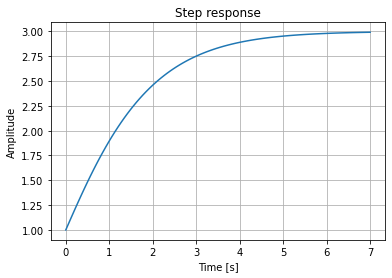

In [9]:
t, y = signal.step(sys)
plt.plot(t, y)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response')
plt.grid()

In [31]:
num = [5]
den = [1/5, 1]
sys = signal.TransferFunction(num, den)

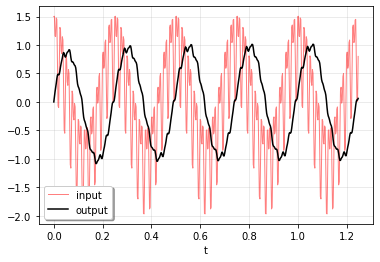

In [32]:
t = np.linspace(0, 1.25, 500, endpoint=False)
u = (np.cos(2*np.pi*4*t) + 0.6*np.sin(2*np.pi*40*t) +
     0.5*np.cos(2*np.pi*80*t))
tout, yout, xout = signal.lsim(sys, U=u, T=t)
plt.plot(t, u, 'r', alpha=0.5, linewidth=1, label='input')
plt.plot(tout, yout, 'k', linewidth=1.5, label='output')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()



In [12]:
w, mag, phase = signal.bode(sys)

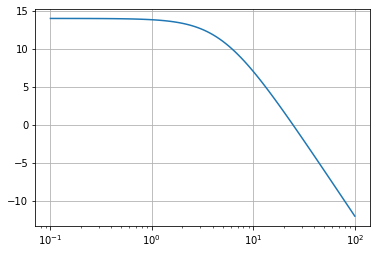

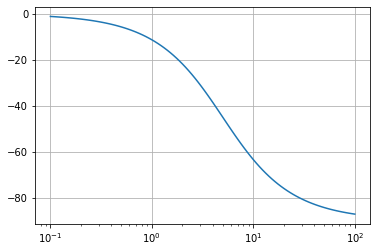

In [13]:
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

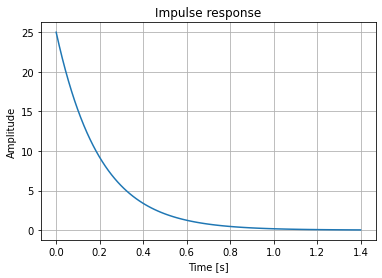

In [14]:
t, y = signal.impulse(sys)
plt.plot(t, y)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Impulse response')
plt.grid()

In [15]:
from scipy.signal import bessel, lsim

In [16]:
b, a = bessel(N=5, Wn=2*np.pi*12, btype='lowpass', analog=True)

In [17]:
b, a

(array([2.43671969e+09]),
 array([1.00000000e+00, 2.87320102e+02, 3.85246591e+04, 2.95170906e+06,
        1.27212802e+08, 2.43671969e+09]))

In [18]:
t = np.linspace(0, 1.25, 500, endpoint=False)

In [19]:
u = (np.cos(2*np.pi*4*t) + 0.6*np.sin(2*np.pi*40*t) +
     0.5*np.cos(2*np.pi*80*t))

In [20]:
tout, yout, xout = lsim((b, a), U=u, T=t)

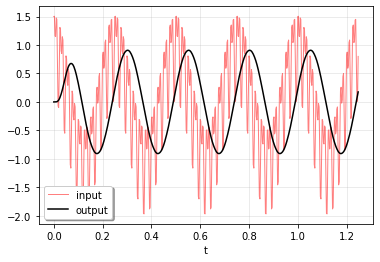

In [21]:
plt.plot(t, u, 'r', alpha=0.5, linewidth=1, label='input')
plt.plot(tout, yout, 'k', linewidth=1.5, label='output')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

In [22]:
from scipy.signal import lti
A = np.array([[0.0, 1.0], [0.0, 0.0]])
B = np.array([[0.0], [1.0]])
C = np.array([[1.0, 0.0]])
D = 0.0
system = lti(A, B, C, D)

In [23]:
from scipy.signal import tf2ss
A, B, C, D = tf2ss(num, den)

In [24]:
A, B, C, D

(array([[-5.]]), array([[1.]]), array([[25.]]), array([[0.]]))

In [25]:
b1 = signal.firwin(40, 0.5)
b2 = signal.firwin(41, [0.3, 0.8])
w1, h1 = signal.freqz(b1)
w2, h2 = signal.freqz(b2)

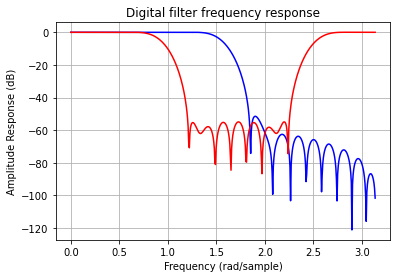

In [26]:
plt.title('Digital filter frequency response')
plt.plot(w1, 20*np.log10(np.abs(h1)), 'b')
plt.plot(w2, 20*np.log10(np.abs(h2)), 'r')
plt.ylabel('Amplitude Response (dB)')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.show()

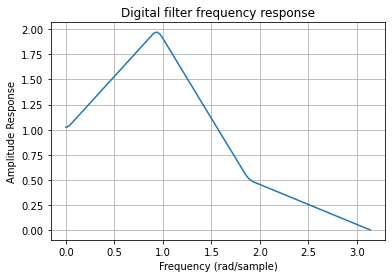

In [27]:
b = signal.firwin2(150, [0.0, 0.3, 0.6, 1.0], [1.0, 2.0, 0.5, 0.0])
w, h = signal.freqz(b)
plt.title('Digital filter frequency response')
plt.plot(w, np.abs(h))
plt.title('Digital filter frequency response')
plt.ylabel('Amplitude Response')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.show()

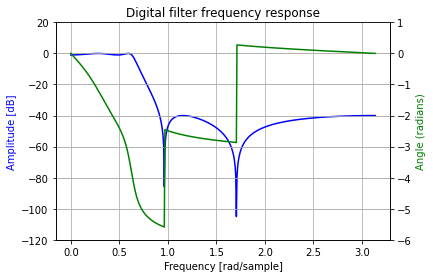

In [28]:
import matplotlib.ticker
wp = 0.2
ws = 0.3
gpass = 1
gstop = 40
system = signal.iirdesign(wp, ws, gpass, gstop)
w, h = signal.freqz(*system)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax1.grid()
ax1.set_ylim([-120, 20])
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
ax2.set_ylim([-6, 1])
nticks = 8
ax1.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))
ax2.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))

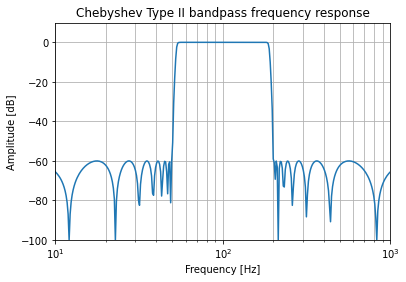

In [29]:
b, a = signal.iirfilter(17, [2*np.pi*50, 2*np.pi*200], rs=60,
                        btype='band', analog=True, ftype='cheby2')
w, h = signal.freqs(b, a, 1000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w / (2*np.pi), 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title('Chebyshev Type II bandpass frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()

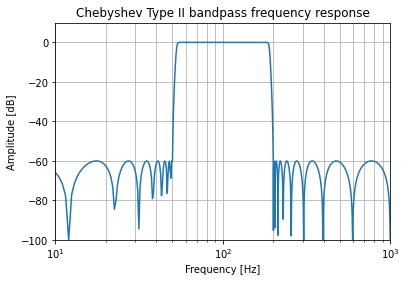

In [30]:
sos = signal.iirfilter(17, [50, 200], rs=60, btype='band',
                       analog=False, ftype='cheby2', fs=2000,
                       output='sos')
w, h = signal.sosfreqz(sos, 2000, fs=2000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w, 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title('Chebyshev Type II bandpass frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()